In [4]:
from curve_new_data import get_predicted_curves
import pandas as pd
import pysurvival
from pysurvival.utils import load_model
from pysurvival.utils.display import create_risk_groups
import numpy as np
from cleaning import cleaning

import warnings
warnings.simplefilter('ignore')

from pysurvival.models.survival_forest import ExtraSurvivalTreesModel
import matplotlib.pyplot as plt

import lifelines

In [5]:
estimator_loaded = load_model('trained_models/ExtraST_model.zip')

Loading the model from trained_models/ExtraST_model.zip


In [6]:
features = pd.read_csv("trained_models/Features_ExtraST_model.csv").iloc[:,1]


In [7]:
X_train, X_test, y_train, y_test = cleaning('train.csv',0.2)

X_train = pd.concat([X_train,X_test])
y_train = pd.concat([y_train,y_test])

In [8]:
X_train = X_train[features]

In [9]:
X_train

,cutaneous_biopsy_ulceration,scenario,cutaneous_biopsy_histological_subtype,cutaneous_biopsy_breslow,total_count_slnb_ldn,visceral_metastasis_location,total_positives_slnb_ldn,patient_hair_color,cutaneous_biopsy_lymphatic_invasion,patient_eye_color,...,LAB2467,LAB1309,primary_tumour_location_coded,LAB2476,LAB2679,LAB2404,cutaneous_biopsy_predominant_cell_type,LAB2407,LAB1301,LAB2498
1433,103.969494,0.542266,0.197427,0.003333,0.000000,0.9117,0.000000,0.128812,0,0.138016,...,0.305085,0.014749,0.493579,0.027291,0.008837,0.162791,0.446967,0.057143,0.144044,0.863636
630,71.823529,0.603296,0.258478,0.115000,0.035088,0.9117,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.253265,0.000000,0.000000,0.000000,0.446967,0.000000,0.000000,0.000000
78,103.969494,0.603296,0.490578,0.035000,0.052632,0.9117,0.000000,0.064383,0,0.074893,...,0.000000,0.000000,0.493579,0.000000,0.000000,0.000000,0.232664,0.000000,0.000000,0.000000
366,103.969494,0.542266,0.490578,0.013333,0.000000,0.9117,0.000000,0.128812,0,0.138016,...,0.000000,0.000000,0.559139,0.000000,0.000000,0.000000,0.446967,0.000000,0.000000,0.000000
1995,103.969494,0.542266,0.490578,0.050000,0.057113,0.9117,0.017114,0.000000,0,0.000000,...,0.000000,0.000000,0.493579,0.000000,0.000000,0.000000,0.232664,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,103.969494,0.542266,0.197427,0.013333,0.000000,0.9117,0.000000,0.128812,0,0.138016,...,0.000000,0.000000,0.253265,0.000000,0.000000,0.000000,0.232664,0.000000,0.000000,0.000000
1841,71.823529,0.603296,0.490578,0.061667,0.035088,0.9117,0.000000,0.064383,0,0.074893,...,0.281356,0.018682,0.493579,0.081874,0.004418,0.075581,0.446967,0.142857,0.281163,0.795455
445,71.823529,0.316578,0.490578,0.023333,0.438596,0.9117,0.095238,0.128812,0,0.138016,...,0.000000,0.000000,0.336819,0.000000,0.000000,0.000000,0.232664,0.000000,0.000000,0.000000
548,103.969494,0.603296,0.258478,0.131667,0.017544,0.9117,0.000000,0.128812,0,0.138016,...,0.000000,0.000000,0.493579,0.000000,0.000000,0.000000,0.446967,0.000000,0.000000,0.000000


In [10]:
risks = estimator_loaded.predict_risk(X_train)

risk_df = pd.DataFrame(risks,columns=['Risk'])
risk_df = np.log(risk_df)

In [11]:
risk_df.describe()

,Risk
count,2148.000000
mean,3.595174
std,1.021861
min,1.144906
25%,2.765555
50%,3.496430
75%,4.455559
max,6.010688


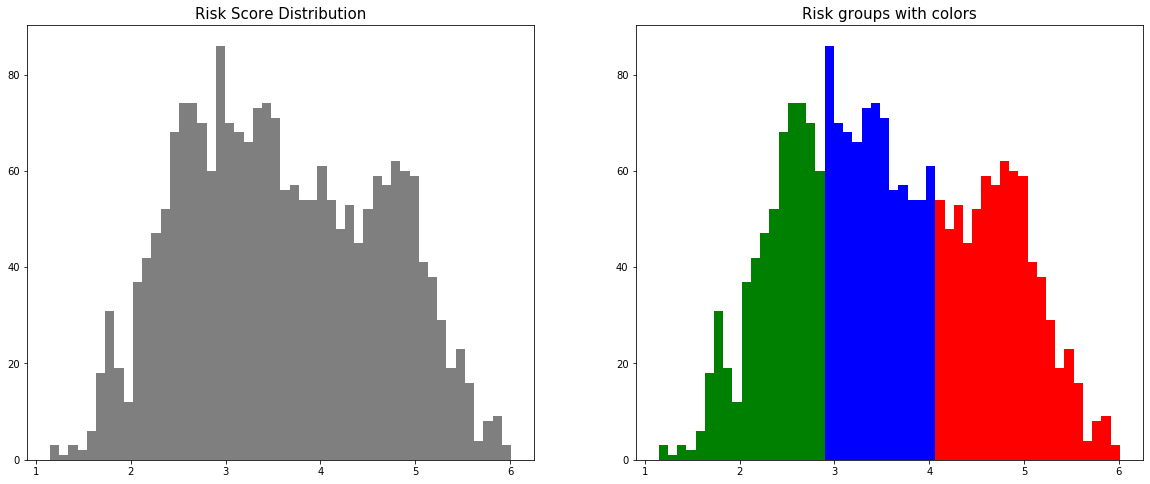

{'low': ('green',
  [3,
   5,
   12,
   14,
   20,
   25,
   29,
   37,
   38,
   48,
   54,
   55,
   59,
   62,
   66,
   69,
   72,
   74,
   81,
   82,
   85,
   89,
   96,
   107,
   113,
   115,
   121,
   124,
   130,
   132,
   144,
   145,
   146,
   150,
   151,
   152,
   161,
   165,
   168,
   170,
   175,
   183,
   184,
   193,
   197,
   203,
   204,
   216,
   219,
   234,
   235,
   236,
   243,
   244,
   249,
   253,
   262,
   268,
   278,
   279,
   280,
   285,
   288,
   300,
   302,
   306,
   309,
   325,
   331,
   332,
   333,
   334,
   337,
   343,
   344,
   345,
   347,
   352,
   353,
   357,
   362,
   364,
   373,
   376,
   377,
   378,
   382,
   384,
   386,
   391,
   394,
   399,
   402,
   406,
   411,
   412,
   413,
   414,
   418,
   424,
   429,
   431,
   443,
   446,
   448,
   458,
   461,
   466,
   468,
   469,
   474,
   475,
   478,
   479,
   482,
   486,
   487,
   494,
   496,
   500,
   505,
   511,
   512,
   516,
   525,
   528,

In [12]:
create_risk_groups(estimator_loaded, X_train, use_log = True, num_bins = 50,
    low={'lower_bound':0, 'upper_bound':2.8, 'color':'green'},
    medium={'lower_bound':2.8, 'upper_bound':4.0,'color':'blue'},
    high={'lower_bound':4.0, 'upper_bound':6.0,  'color':'red'})

In [13]:
#thres= [160,220]

thres1 = [2.8,3.0,3.2,3.4,3.5]
thres2 = [3.8,4.0,4.2,4.4,4.6,4.8, 5.0,5.2]

#thres1 = [10,15,20,25,30,35,40,45,50,60]
#thres2 = [25,30,35,40,45,50,55,60,65,70,75,80,90,100,110,120]


p_values = pd.DataFrame(np.array([[0,0,0,0,0,0]]), columns=['t1','t2', 'p1','p2','p3','p_mean'])
for t1 in thres1:
    for t2 in thres2:
        if t2>t1:
            g1 = risk_df[risk_df.Risk<t1]
            g2 = risk_df[(risk_df.Risk>=t1) & (risk_df.Risk<t2)]
            g3 = risk_df[risk_df.Risk>=t2]

            groups = np.zeros(risk_df.shape[0])
            groups[g1.index] = 1
            groups[g2.index] = 2
            groups[g3.index] = 3

            event_durations = y_train.months_survival.values
            event_observed= y_train.specific_death.values

            result = lifelines.statistics.pairwise_logrank_test(event_durations, groups, event_observed)
            p_vals = result.p_value

            aux = pd.DataFrame(np.array([[t1,t2,p_vals[0],p_vals[1],p_vals[2],np.mean(p_vals)]]), columns=['t1','t2', 'p1','p2','p3','p_mean'])
            p_values = pd.concat([p_values, aux], axis=0)

p_values.index= np.arange(0, p_values.shape[0])
p_values.drop(0, inplace=True)
p_values.sort_values(by=['p_mean'], ascending=False, inplace=True)

In [14]:
p_values.head(10)

,t1,t2,p1,p2,p3,p_mean
1,2.8,3.8,1.060729e-08,1.271205e-62,4.122423e-55,3.535764e-09
2,2.8,4.0,2.366147e-09,1.279389e-70,5.353672e-69,7.887158e-10
33,3.5,3.8,1.008607e-16,9.249738e-107,6.411564e-11,2.137191e-11
3,2.8,4.2,1.341723e-11,2.043509e-80,6.244114e-82,4.472411e-12
9,3.0,3.8,1.972696e-13,8.766539e-79,2.324605e-40,6.575652e-14
4,2.8,4.4,1.169785e-13,2.353418e-93,2.380666e-99,3.899284e-14
10,3.0,4.0,4.786867e-14,8.175886e-89,7.928202e-53,1.595622e-14
5,2.8,4.6,6.236941e-15,5.292620e-110,1.719196e-123,2.078980e-15
25,3.4,3.8,8.383744e-17,9.635703e-102,2.499013e-17,3.627586e-17
34,3.5,4.0,6.564099e-17,4.463540e-121,4.462355e-20,2.189520e-17


In [18]:
t1=2.8
t2=4.0#4.0

g1 = risk_df[risk_df.Risk<t1]
g2 = risk_df[(risk_df.Risk>=t1) & (risk_df.Risk<t2)]
g3 = risk_df[risk_df.Risk>=t2]

print(g1.shape)
print(g2.shape)
print(g3.shape)


(560, 1)
(800, 1)
(788, 1)


In [19]:
risk_norm = risk_df/np.max(risk_df)

In [20]:
risk_norm.describe()

,Risk
count,2148.000000
mean,0.598130
std,0.170007
min,0.190478
25%,0.460106
50%,0.581702
75%,0.741273
max,1.000000


In [21]:
t1_norm = t1/np.max(risk_df)[0]

In [22]:
t2_norm = t2/np.max(risk_df)[0]

max_val = np.max(risk_df)[0]

In [23]:
risk_df['group']=groups

In [24]:
risk_df.to_csv('risks.csv')

In [25]:
keep_thresholds = pd.DataFrame([[t1_norm,t2_norm,max_val]], columns=["Threshold1-2","Threshold2-3", "Normalization_max"] )
keep_thresholds.to_csv('thresholds.csv')